**Imports**

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DateTime as dt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Case 1: Predicting TSLA stock prices**

In [147]:
df = pd.read_csv("TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
1,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
2,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800
3,2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200
4,2022-11-07,208.649994,208.899994,196.660004,197.080002,197.080002,93916500
...,...,...,...,...,...,...,...
246,2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
247,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
248,2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100
249,2023-10-30,209.279999,210.880005,194.669998,197.360001,197.360001,136448200


**Model 1:**

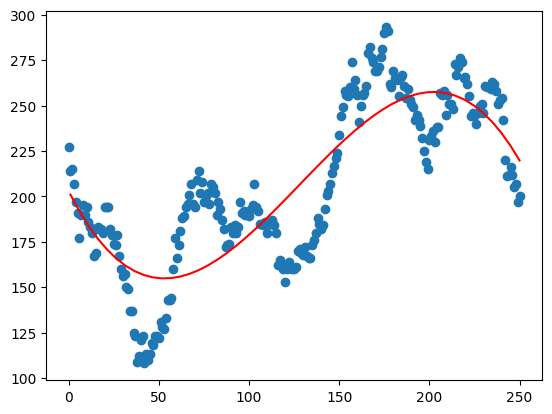

0.6959597237939674


In [148]:
x = []
y = []
for i in range(251):
    x.append(i)
    y.append(int(df.loc[i, "Close"]))

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 250)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline), color = 'red')
plt.show()
print(metrics.r2_score(y, mymodel(x)))

An r-squared value of 0.696 indicate that it is a mediocre relationship.

In [149]:
date = "2024-05-18"
try:
    date = dt.DateTime(date)
    start_date = df.loc[0, "Date"]
    start_date = dt.DateTime(start_date)
    date_value = int(date - start_date)

    if date_value >= 0:
        print("In the date " + str(date) + " the close stock wil be " + 
             str(int(mymodel(date_value))) + ", according to this model.")

    else:
        print("The input date is negative!")

except:
    print("The input value is not convertible!")

In the date 2024/05/18 00:00:00 GMT+0 the close stock wil be -4455, according to this model.


This model does not work well, since it thinks the stock will crash down into the negatives.

**Model 2:**

In [150]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"] = (df["Date"] - df["Date"].min()).dt.days

X = pd.DataFrame(df["Date"])
y = pd.DataFrame(df["Close"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)
Y_pred = model.predict(X_train)

LinearRegression()

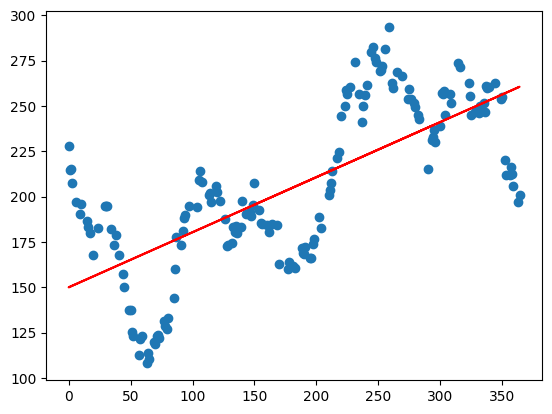

MSE = 1035.323823447373


In [153]:
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color = "red")
plt.show()
print("MSE = " + str(metrics.mean_squared_error(y_train, Y_pred)))

In [151]:
future_date = dt.DateTime(2023,11,1)
days_since_start = future_date - start_date
future_price = model.predict([[days_since_start]])
print("Predicted future price: " + str(future_price[0]))

Predicted future price: [260.94667083]


/Users/danielsunnana/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


This models works much better, it is much closer to the values in the csv-file, but it thinks the stock will steadly increace.